In [1]:
#pip install -r requirements.txt


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/2.9 MB 1.9 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/2.9 MB 1.9 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/2.9 MB 1.5 MB/s eta 0:00:02
     --------------------- ------------------ 1.6/2.9 MB 1.6 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/2.9 MB 1.7 MB/s eta 0:00:01
     ----------------------------------- ---- 2.6/2.9 MB 1.8 MB/s eta 0:00

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiohttp 3.8.1 requires charset-normalizer<3.0,>=2.0, but you have charset-normalizer 3.3.2 which is incompatible.
dateparser 1.1.1 requires regex!=2019.02.19,!=2021.8.27,<2022.3.15, but you have regex 2024.4.16 which is incompatible.
virtualenv 20.13.4 requires platformdirs<3,>=2, but you have platformdirs 4.1.0 which is incompatible.



   --------- ------------------------------ 2.6/10.6 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/10.6 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/10.6 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/10.6 MB 1.8 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/10.6 MB 1.9 MB/s eta 0:00:04
   ----------------- ---------------------- 4.7/10.6 MB 1.9 MB/s eta 0:00:04
   ------------------- -------------------- 5.2/10.6 MB 1.9 MB/s eta 0:00:03
   -------------------- ------------------- 5.5/10.6 MB 1.9 MB/s eta 0:00:03
   ---------------------- ----------------- 6.0/10.6 MB 1.9 MB/s eta 0:00:03
   ------------------------ --------------- 6.6/10.6 MB 1.9 MB/s eta 0:00:03
   ------------------------- -------------- 6.8/10.6 MB 1.9 MB/s eta 0:00:02
   --------------------------- ------------ 7.3/10.6 MB 1.9 MB/s eta 0:00:02
   ----------------------------- ---------- 7.9/10.6 MB 1.9 MB/s eta 0:00:0


   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plotly]
   ------------------------ --------------- 48/77 [plot


Testando: Neurônios=64, LR=0.01, Camadas=1
1/1 [==============================] - 0s 409ms/step
MAPE: 0.04%

Testando: Neurônios=64, LR=0.01, Camadas=2
1/1 [==============================] - 1s 748ms/step
MAPE: 0.04%

Testando: Neurônios=64, LR=0.001, Camadas=1
1/1 [==============================] - 0s 413ms/step
MAPE: 0.03%

Testando: Neurônios=64, LR=0.001, Camadas=2
1/1 [==============================] - 1s 758ms/step
MAPE: 0.06%

Testando: Neurônios=128, LR=0.01, Camadas=1
1/1 [==============================] - 0s 438ms/step
MAPE: 0.04%

Testando: Neurônios=128, LR=0.01, Camadas=2
1/1 [==============================] - 1s 760ms/step
MAPE: 0.04%

Testando: Neurônios=128, LR=0.001, Camadas=1
1/1 [==============================] - 0s 420ms/step
MAPE: 0.05%

Testando: Neurônios=128, LR=0.001, Camadas=2
1/1 [==============================] - 1s 793ms/step
MAPE: 0.05%

Testando: Neurônios=256, LR=0.01, Camadas=1
1/1 [==============================] - 0s 417ms/step
MAPE: 0.04%

Testando:

C:\Users\E124796\AppData\Local\Temp\2\ipykernel_10696\1214069578.py:156: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(best_model, 'melhor_modelo.h5')


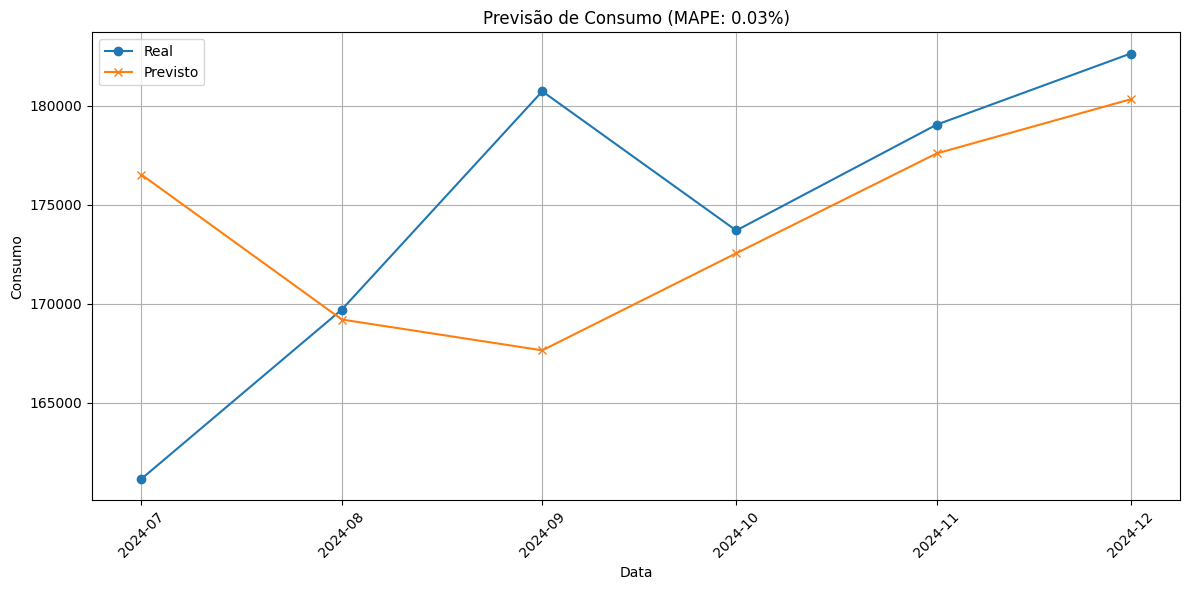

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf
import os
from keras.regularizers import L1L2
from keras.models import save_model

# Função personalizada para calcular o MAPE como loss
def mape_loss(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

# Função para criar datasets
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Função para construir modelo dinâmico
def build_dynamic_model(input_shape, neurons=100, learning_rate=0.01, n_layers=2):
    model = Sequential()
    
    # Adiciona a primeira camada LSTM
    model.add(LSTM(
        neurons, 
        return_sequences=(n_layers > 1), 
        input_shape=input_shape,
        kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)
    ))
    model.add(Dropout(0.2))
    
    # Adiciona camadas LSTM intermediárias
    for i in range(1, n_layers):
        return_seq = (i != n_layers - 1)
        model.add(LSTM(
            neurons // (2 ** i),  
            return_sequences=return_seq,
            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)
        ))
        model.add(Dropout(0.2))
    
    # Camadas densas finais
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss=mape_loss, optimizer=optimizer)
    return model

# Função principal
def prever_e_plotar(caminho_arquivo):
    # Carregar e preparar dados
    df = pd.read_csv(caminho_arquivo, sep=';')
    df['AM_REFERENCIA'] = pd.to_datetime(df['AM_REFERENCIA'], format='%Y%m')
    df_aggregated = df.groupby('AM_REFERENCIA')['HCLQTCON'].sum().reset_index()
    df_aggregated = df_aggregated.sort_values(by='AM_REFERENCIA')
    
    # Adicionar índice numérico para facilitar a divisão
    df_aggregated['index'] = range(len(df_aggregated))
    
    # Normalização
    scaler = MinMaxScaler(feature_range=(0, 1))
    ts_scaled = scaler.fit_transform(df_aggregated[['HCLQTCON']]).flatten()
    
    # Encontrar índices de corte baseados nas datas
    train_end_idx = df_aggregated[df_aggregated['AM_REFERENCIA'] <= pd.to_datetime('2023-12-31')]['index'].max()
    test_start_idx = df_aggregated[df_aggregated['AM_REFERENCIA'] >= pd.to_datetime('2024-01-01')]['index'].min()
    test_end_idx = df_aggregated[df_aggregated['AM_REFERENCIA'] <= pd.to_datetime('2024-12-31')]['index'].max()
    
    # Divisão treino-teste
    train = ts_scaled[:train_end_idx+1]
    test = ts_scaled[test_start_idx:test_end_idx+1]
    
    # Criar datasets
    look_back = 6
    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)
    
    if len(X_train) == 0 or len(X_test) == 0:
        raise ValueError("Dados insuficientes.")

    # Reshape
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Hiperparâmetros para teste dinâmico
    params_grid = {
        'neurons': [64, 128, 256],
        'learning_rate': [0.01, 0.001],
        'n_layers': [1, 2],
        'epochs': [50, 100, 200],
        'batch_size': [1, 4]
    }

    best_mape = float('inf')
    best_model = None
    best_params = {}
    best_scaler = None

    # Busca por melhor combinação
    for neurons in params_grid['neurons']:
        for lr in params_grid['learning_rate']:
            for n_layers in params_grid['n_layers']:
                print(f"\nTestando: Neurônios={neurons}, LR={lr}, Camadas={n_layers}")
                
                model = build_dynamic_model(
                    input_shape=(X_train.shape[1], 1),
                    neurons=neurons,
                    learning_rate=lr,
                    n_layers=n_layers
                )
                
                early_stop = EarlyStopping(monitor='loss', patience=10)
                
                history = model.fit(
                    X_train, Y_train,
                    epochs=params_grid['epochs'][1],
                    batch_size=params_grid['batch_size'][0],
                    verbose=0,
                    callbacks=[early_stop]
                )
                
                predictions = model.predict(X_test)
                predictions = scaler.inverse_transform(predictions).flatten()
                Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1)).flatten()
                
                mape_value = mape(Y_test_inv, predictions)
                print(f"MAPE: {mape_value:.2f}%")
                
                if mape_value < best_mape:
                    best_mape = mape_value
                    best_model = model
                    best_params = {
                        'neurons': neurons,
                        'learning_rate': lr,
                        'n_layers': n_layers,
                        'epochs': len(history.history['loss'])
                    }
                    best_scaler = scaler

    # Resultados finais
    print("\nMelhores Parâmetros Encontrados:")
    print(best_params)
    print(f"Melhor MAPE: {best_mape:.2f}%")

    # Salvar o melhor modelo e o scaler
    save_model(best_model, 'melhor_modelo.h5')
    import joblib
    joblib.dump(best_scaler, 'scaler.save')
    print("Modelo e scaler salvos com sucesso!")

    # Previsões finais
    final_predictions = best_model.predict(X_test)
    final_predictions = best_scaler.inverse_transform(final_predictions.reshape(-1, 1)).flatten()

    # Obter as datas correspondentes aos testes
    test_dates = df_aggregated.iloc[test_start_idx+look_back:test_end_idx+1]['AM_REFERENCIA'].values
    
    # DataFrame de comparação
    comparison_df = pd.DataFrame({
        'Data': test_dates,
        'Valor Real': best_scaler.inverse_transform(Y_test.reshape(-1, 1)).flatten(),
        'Valor Previsto': final_predictions
    })

    print("\nComparação Final:")
    print(comparison_df)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(comparison_df['Data'], comparison_df['Valor Real'], label='Real', marker='o')
    plt.plot(comparison_df['Data'], comparison_df['Valor Previsto'], label='Previsto', marker='x')
    plt.title(f"Previsão de Consumo (MAPE: {best_mape:.2f}%)")
    plt.xlabel("Data")
    plt.ylabel("Consumo")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Execução
if __name__ == "__main__":
    path = 'E:\\Projetos\\ABMS-WP'
    caminho_arquivo = os.path.join(path, 'includes\\Tabela_consumo_Itapua_120m.csv')
    prever_e_plotar(caminho_arquivo)